In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle_mall as wm

import warnings
warnings.filterwarnings("ignore")

# Clustering with Kmeans

- Easy to use and iterate over

- We determine the number of clusters

- Assumption made that the clusters will be circular

- Scale your data! Kmeans uses distance

- .cluster_centers_, .inertia_ (attributes of clusters usually end with an underscore '_')

In [2]:
df = wm.get_mall_data()
df.shape

(200, 5)

In [3]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
train, validate, test = wm.train_val_test(df)
train.shape, validate.shape, test.shape

((140, 5), (30, 5), (30, 5))

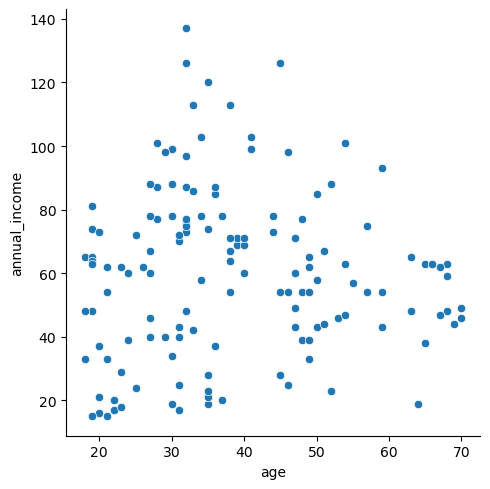

In [5]:
sns.relplot(x= 'age', y = 'annual_income', data = train)
plt.show()

In [6]:
X = train[['age', 'annual_income']]

In [7]:
seed = 42

kmeans = KMeans(n_clusters=3, random_state= seed)

kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2,
       2, 0, 1, 2, 2, 1, 2, 1], dtype=int32)

In [8]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,age,annual_income,unscaled_clusters
197,32,126,2
2,20,16,0
54,50,43,1
118,51,67,1
181,32,97,2


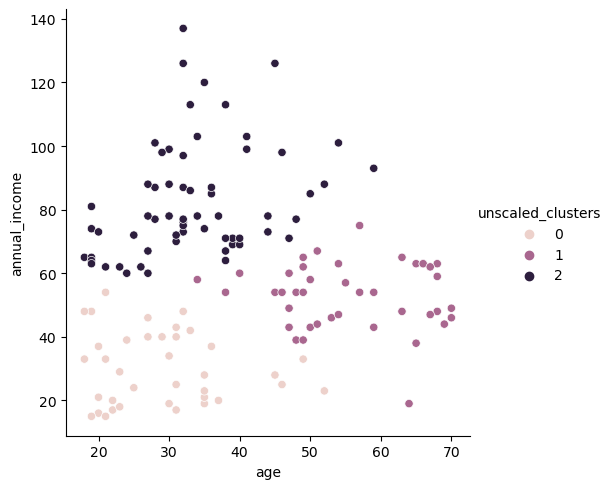

In [9]:
sns.relplot(data=X, x='age', y='annual_income', hue='unscaled_clusters')
plt.show()

In [10]:
mm_scaler = MinMaxScaler()

X[['age', 'annual_income']] = mm_scaler.fit_transform(X[['age', 'annual_income']])

X.head()

,age,annual_income,unscaled_clusters
197,0.269231,0.909836,2
2,0.038462,0.008197,0
54,0.615385,0.229508,1
118,0.634615,0.426230,1
181,0.269231,0.672131,2


In [11]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['age', 'annual_income']])

KMeans(n_clusters=3, random_state=42)

In [12]:
kmeans_scale.predict(X[['age', 'annual_income']])

array([2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 1], dtype=int32)

In [13]:
X['scaled_clusters'] = kmeans_scale.predict(X[['age', 'annual_income']])

X.head()

,age,annual_income,unscaled_clusters,scaled_clusters
197,0.269231,0.909836,2,2
2,0.038462,0.008197,0,0
54,0.615385,0.229508,1,1
118,0.634615,0.426230,1,1
181,0.269231,0.672131,2,2


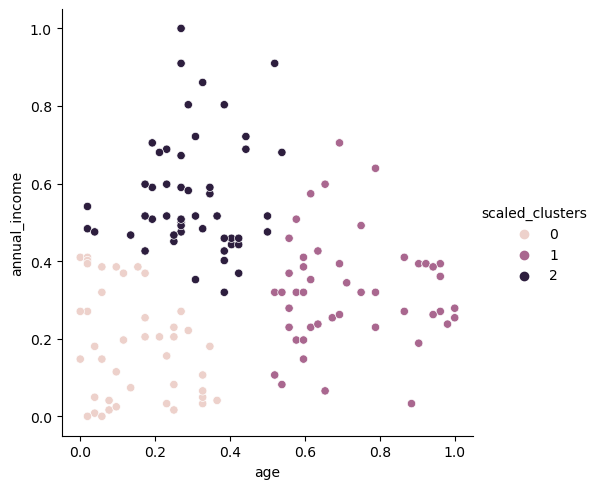

In [14]:
sns.relplot(data = X, x = 'age', y = 'annual_income', hue = 'scaled_clusters')
plt.show()

In [15]:
kmeans_scale.cluster_centers_

array([[0.14697802, 0.18384075],
       [0.7255609 , 0.32530738],
       [0.30038462, 0.56868852]])

In [16]:
kmeans_scale.inertia_

5.300633787229961

In [17]:
inertia = []
seed = 42 

for n in range(1,11):
    
    kmeans = KMeans(n_clusters = n, random_state = seed)
    
    kmeans.fit(X[['age', 'annual_income']])
    
    inertia.append(kmeans.inertia_)
    
    
inertia    

[17.09840071972195,
 9.157598138793384,
 5.300633787229961,
 4.2153162962907125,
 3.189700010142959,
 2.5962146010339695,
 2.037938722445505,
 1.6988782031048137,
 1.499929798779048,
 1.288606246633992]

In [18]:
results_df = pd.DataFrame({'n_clusters': list(range(1,11)),
                           'inertia': inertia})

results_df

,n_clusters,inertia
0,1,17.098401
1,2,9.157598
2,3,5.300634
3,4,4.215316
4,5,3.189700
5,6,2.596215
6,7,2.037939
7,8,1.698878
8,9,1.499930
9,10,1.288606


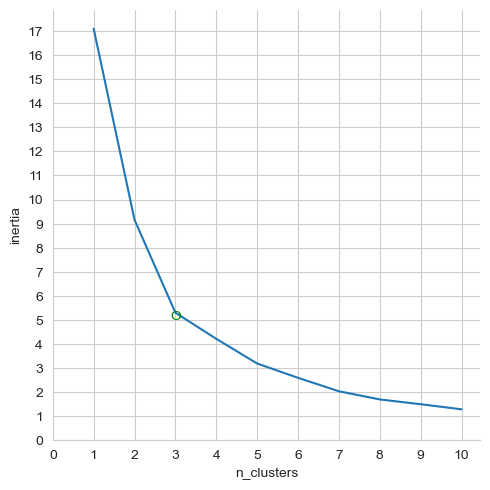

In [19]:
sns.set_style("whitegrid")
sns.relplot(data = results_df, x='n_clusters', y = 'inertia', kind = 'line')
plt.xticks(np.arange(0, 11, step=1))
plt.yticks(np.arange(0, 18, step=1))
point = (2.88, 5) # specify the x and y values of the point to annotate
plt.annotate("O", xy=point, c= 'green')
plt.show()